<a href="https://colab.research.google.com/github/RA2112702010007AD/GrowthLinkIntern/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# 🌐 Download dataset using KaggleHub (assuming churn-related dataset here)
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("📂 Path to dataset files:", path)

📂 Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [6]:
import os
print(os.listdir(path))

['spam.csv']


In [12]:
churn_file = f"{path}/spam.csv"
df = pd.read_csv(churn_file, encoding='latin-1') # Added encoding='latin-1'

In [13]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
# 🔎 Missing value check
print("Missing values:\n", df.isnull().sum())

Missing values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [15]:
# 🧹 Imputation
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [17]:
# 🧹 Imputation
# Selecting numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns # Changed to 'number'
cat_cols = df.select_dtypes(include=['object']).columns

# Proceed with imputation if there are numerical columns
if len(num_cols) > 0:
    num_imputer = SimpleImputer(strategy='mean')
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [18]:
# 🎭 Label encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [20]:
# 🏹 Define features and target
target_col = 'v1'  # Changed from 'Churn' to 'v1'
X = df.drop(columns=[target_col])
y = df[target_col]

In [21]:
# 📊 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# 🌪️ Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# 🌳 Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌟 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


🌟 Random Forest Results
[[902  63]
 [ 42 108]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       965
           1       0.63      0.72      0.67       150

    accuracy                           0.91      1115
   macro avg       0.79      0.83      0.81      1115
weighted avg       0.91      0.91      0.91      1115

Accuracy: 0.905829596412556


In [24]:
# ➕ Logistic Regression for comparison
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n🧠 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


🧠 Logistic Regression Results
[[965   0]
 [150   0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115

Accuracy: 0.8654708520179372


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# 🔥 Feature importance
importances = rf_model.feature_importances_
features = df.drop(columns=[target_col]).columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

<ipython-input-26-02f7979010b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')


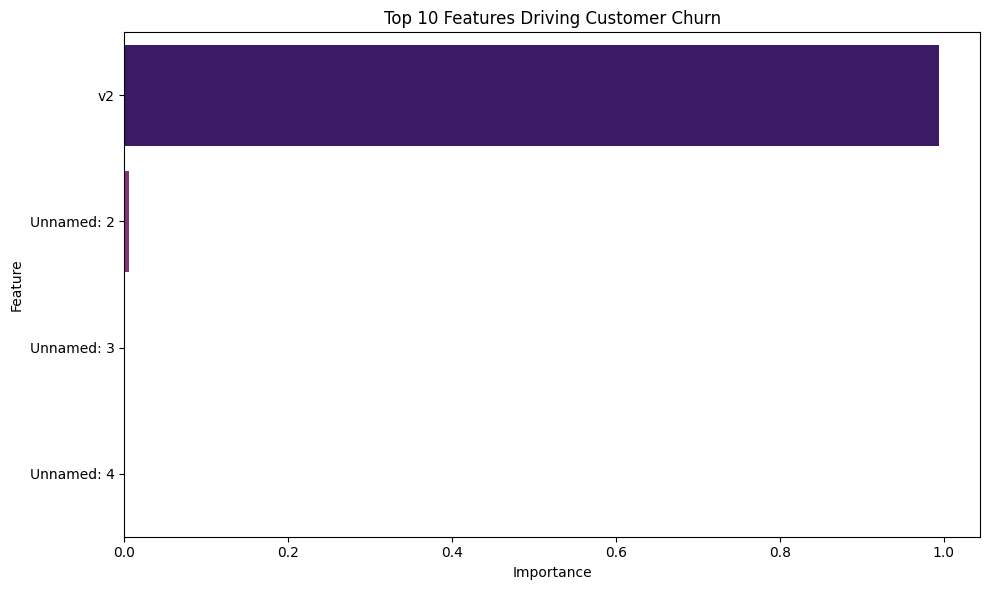

In [26]:
# 🎨 Visualize top predictors
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='magma')
plt.title('Top 10 Features Driving Customer Churn')
plt.tight_layout()
plt.show()